Create EDA using the data and make your model to predict RTLMP from the data

**In the data file timeseries_data.xlsx, you can find following timeseries (hourly):**  
  
RTLoad: ERCOT real-time hourly actual load  
WIND_RTI: ERCOT real-time hourly wind generation  
GENERATION_SOLAR_RT: ERCOT real-time solar generation  
RTLMP: ERCOT North hub real-time price

**Requirements:**  
  
Create Exploratory Data Analysis (EDA)  
Create forecast model to predict RTLMP (Real-Time Locational Marginal Prices)

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline
#pip install openpyxl

In [2]:
#df3 = pd.read_excel('D:/Git_Desk/data_works/Guzman Project/Assignment 3 - timeseries_data.xlsx')
df3 = pd.read_excel('C:/Users/DanielS/Desktop/GitHub_Clone/data_works/Guzman Project/Assignment 3 - timeseries_data.xlsx')
df = df3.copy()
df

,DATETIME,HB_NORTH (RTLMP),ERCOT (WIND_RTI),ERCOT (GENERATION_SOLAR_RT),ERCOT (RTLOAD),HOURENDING,MARKETDAY,PEAKTYPE,MONTH,YEAR
0,2017-01-01 01:00:00,23.3575,2155.31,0.00,29485.791355,1,2017-01-01,OFFPEAK,JANUARY,2017
1,2017-01-01 02:00:00,21.4650,2313.81,0.00,28911.565913,2,2017-01-01,OFFPEAK,JANUARY,2017
2,2017-01-01 03:00:00,20.7350,2587.68,0.00,28238.258175,3,2017-01-01,OFFPEAK,JANUARY,2017
3,2017-01-01 04:00:00,20.2700,2748.65,0.00,27821.000513,4,2017-01-01,OFFPEAK,JANUARY,2017
4,2017-01-01 05:00:00,20.1200,2757.49,0.00,27646.942413,5,2017-01-01,OFFPEAK,JANUARY,2017
...,...,...,...,...,...,...,...,...,...,...
14982,2018-09-17 08:00:00,20.8600,3195.52,2.04,41902.240000,8,2018-09-17,WDPEAK,SEPTEMBER,2018
14983,2018-09-17 09:00:00,22.7675,2605.50,111.59,43014.370000,9,2018-09-17,WDPEAK,SEPTEMBER,2018
14984,2018-09-17 10:00:00,31.0600,2034.80,261.65,45782.550000,10,2018-09-17,WDPEAK,SEPTEMBER,2018
14985,2018-09-17 11:00:00,29.6700,NaN,464.88,49431.130000,11,2018-09-17,WDPEAK,SEPTEMBER,2018


### Exploratory Data Analysis (EDA)

In [3]:
df.sort_values(by="HB_NORTH (RTLMP)", ascending=False)

,DATETIME,HB_NORTH (RTLMP),ERCOT (WIND_RTI),ERCOT (GENERATION_SOLAR_RT),ERCOT (RTLOAD),HOURENDING,MARKETDAY,PEAKTYPE,MONTH,YEAR
9294,2018-01-23 07:00:00,2809.3575,2826.54,0.82,45679.060018,7,2018-01-23,WDPEAK,JANUARY,2018
12494,2018-06-05 16:00:00,2010.4625,2551.21,1204.49,65851.808693,16,2018-06-05,WDPEAK,JUNE,2018
13767,2018-07-28 17:00:00,1350.1875,3091.11,1183.07,67583.374865,17,2018-07-28,WEPEAK,JULY,2018
13766,2018-07-28 16:00:00,1248.5400,2779.95,1218.68,66711.027373,16,2018-07-28,WEPEAK,JULY,2018
14271,2018-08-18 17:00:00,1105.3150,4819.98,823.82,68399.665740,17,2018-08-18,WEPEAK,AUGUST,2018
...,...,...,...,...,...,...,...,...,...,...
2255,2017-04-05 01:00:00,-9.6625,11972.23,0.00,32575.858775,1,2017-04-05,OFFPEAK,APRIL,2017
218,2017-01-10 03:00:00,-11.4800,11570.82,0.11,28449.908768,3,2017-01-10,OFFPEAK,JANUARY,2017
2673,2017-04-22 11:00:00,-12.5300,11554.00,187.24,35664.608470,11,2017-04-22,WEPEAK,APRIL,2017
217,2017-01-10 02:00:00,-13.6075,11832.67,0.11,28994.028000,2,2017-01-10,OFFPEAK,JANUARY,2017


In [4]:
missing_ob = df.isnull().sum()/ len(df) * 100 

print(missing_ob)

DATETIME                       0.000000
HB_NORTH (RTLMP)               0.000000
ERCOT (WIND_RTI)               0.033362
ERCOT (GENERATION_SOLAR_RT)    0.026690
ERCOT (RTLOAD)                 0.000000
HOURENDING                     0.000000
MARKETDAY                      0.000000
PEAKTYPE                       0.000000
MONTH                          0.000000
YEAR                           0.000000
dtype: float64


All categories have acceptable missing portion.

In [5]:
# Handle missing values
df = df.dropna() #6 of N/A vlaue are dropped.

In [6]:
#data cleaning
df.iloc[:,1:5].duplicated().sum()
df.describe()

,HB_NORTH (RTLMP),ERCOT (WIND_RTI),ERCOT (GENERATION_SOLAR_RT),ERCOT (RTLOAD),HOURENDING,YEAR
count,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000
mean,25.768281,7532.053149,291.997647,42372.917557,12.498765,2017.415460
std,46.370881,3992.742693,370.929008,9874.696215,6.921451,0.492818
min,-17.860000,54.440000,0.000000,25566.511248,1.000000,2017.000000
25%,18.042500,4134.730000,0.000000,35432.588663,7.000000,2017.000000
50%,20.057500,7281.370000,22.150000,39935.131628,12.000000,2017.000000
75%,25.030000,10851.640000,608.660000,47871.380668,18.000000,2018.000000
max,2809.357500,20350.400000,1257.540000,73264.662123,24.000000,2018.000000


In [7]:
df.YEAR.value_counts()

2017    8757
2018    6224
Name: YEAR, dtype: int64

In [8]:
df.PEAKTYPE.value_counts()

WDPEAK     6964
OFFPEAK    4993
WEPEAK     3024
Name: PEAKTYPE, dtype: int64

In [9]:
df.MONTH.value_counts()

JANUARY      1488
MAY          1488
JULY         1488
AUGUST       1488
MARCH        1485
APRIL        1440
JUNE         1440
FEBRUARY     1344
SEPTEMBER    1114
OCTOBER       744
DECEMBER      744
NOVEMBER      718
Name: MONTH, dtype: int64

In [10]:
df.groupby(['YEAR','PEAKTYPE']).size()

YEAR  PEAKTYPE
2017  OFFPEAK     2917
      WDPEAK      4064
      WEPEAK      1776
2018  OFFPEAK     2076
      WDPEAK      2900
      WEPEAK      1248
dtype: int64

In [11]:
# get all peaktypes
grouped_data = df.groupby(['PEAKTYPE', 'MONTH']).size()
grouped_data

PEAKTYPE  MONTH    
OFFPEAK   APRIL        480
          AUGUST       496
          DECEMBER     248
          FEBRUARY     448
          JANUARY      496
          JULY         496
          JUNE         480
          MARCH        493
          MAY          496
          NOVEMBER     238
          OCTOBER      248
          SEPTEMBER    374
WDPEAK    APRIL        656
          AUGUST       736
          DECEMBER     320
          FEBRUARY     640
          JANUARY      688
          JULY         656
          JUNE         688
          MARCH        720
          MAY          704
          NOVEMBER     336
          OCTOBER      352
          SEPTEMBER    468
WEPEAK    APRIL        304
          AUGUST       256
          DECEMBER     176
          FEBRUARY     256
          JANUARY      304
          JULY         336
          JUNE         272
          MARCH        272
          MAY          288
          NOVEMBER     144
          OCTOBER      144
          SEPTEMBER    272
dtype: i

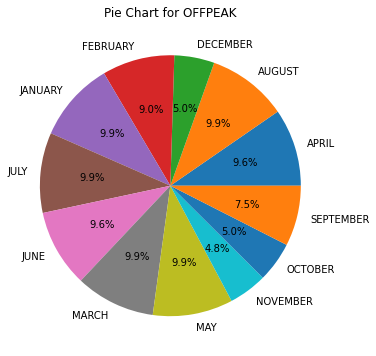

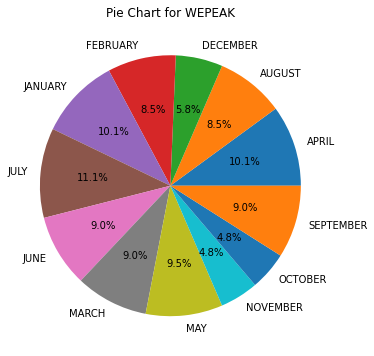

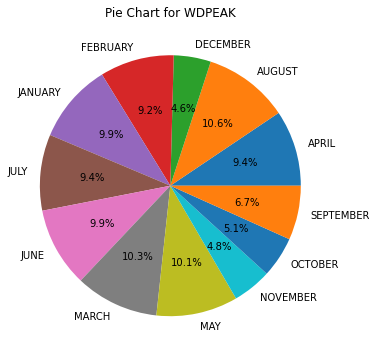

In [12]:
# create 3 pie chart for 3 peaktypes:
peaktypes = df['PEAKTYPE'].unique()

for peaktype in peaktypes:
    # filter data base on demand
    filtered_data = grouped_data.loc[peaktype]
    
    # draw
    plt.figure(figsize=(6, 6))  # 6*6
    plt.pie(filtered_data, labels=filtered_data.index, autopct='%1.1f%%')
    plt.title(f'Pie Chart for {peaktype}')
    plt.show()

In [13]:
df.loc[:, 'DATETIME'] = pd.to_datetime(df['DATETIME'])

df.loc[:, 'MONTH'] = df['MONTH'].replace({
    'JANUARY': '01',
    'FEBRUARY': '02',
    'MARCH': '03',
    'APRIL': '04',
    'MAY': '05',
    'JUNE': '06',
    'JULY': '07',
    'AUGUST': '08',
    'SEPTEMBER': '09',
    'OCTOBER': '10',
    'NOVEMBER': '11',
    'DECEMBER': '12'
})
# Convert 'MONTH' column to numeric data type
#df33.loc[:, 'MONTH'] = pd.to_numeric(df33['MONTH'])

# Extract year from 'YEAR' column if needed
#df33.loc[:, 'YEAR'] = pd.to_datetime(df33['YEAR']).dt.year

df.dtypes

C:\Apps\anaconda\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


DATETIME                       datetime64[ns]
HB_NORTH (RTLMP)                      float64
ERCOT (WIND_RTI)                      float64
ERCOT (GENERATION_SOLAR_RT)           float64
ERCOT (RTLOAD)                        float64
HOURENDING                              int64
MARKETDAY                      datetime64[ns]
PEAKTYPE                               object
MONTH                                  object
YEAR                                    int64
dtype: object

In [14]:
# Graph correlation between time series
corr_vars = ['HB_NORTH (RTLMP)', 'ERCOT (WIND_RTI)', 'ERCOT (GENERATION_SOLAR_RT)', 'ERCOT (RTLOAD)']
df[corr_vars].corr()

,HB_NORTH (RTLMP),ERCOT (WIND_RTI),ERCOT (GENERATION_SOLAR_RT),ERCOT (RTLOAD)
HB_NORTH (RTLMP),1.000000,-0.151156,0.151910,0.238481
ERCOT (WIND_RTI),-0.151156,1.000000,-0.235325,-0.166710
ERCOT (GENERATION_SOLAR_RT),0.151910,-0.235325,1.000000,0.466309
ERCOT (RTLOAD),0.238481,-0.166710,0.466309,1.000000


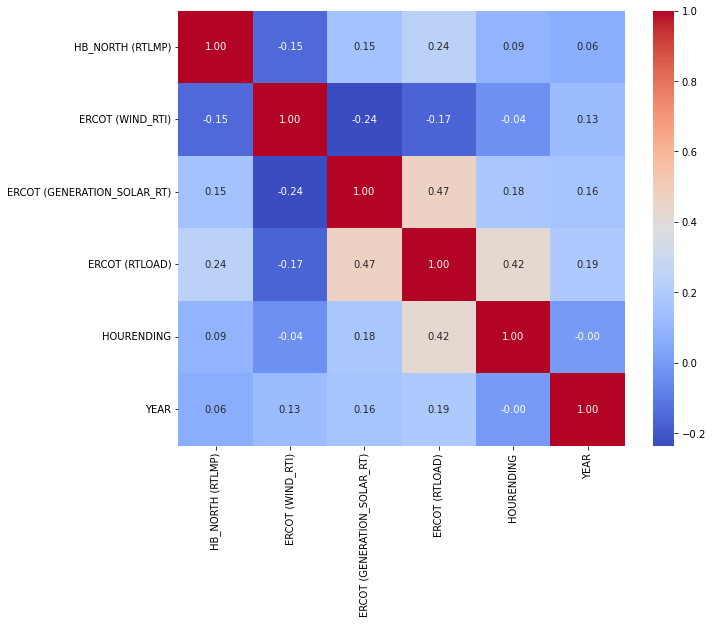

In [15]:
#visualize previous analysis
corr_matrix = df.corr()

# Plotting the heatmap with annotated values
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")

plt.show()

### Strongest Correlation 0.47 is between ERCOT (GENERATION_SOLAR_RT) and ERCOT (RTLOAD).  
### Second Strong correlation 0.42 is between Hour Ending and ERCOT (RTLOAD).

Text(0.5, 1.0, 'RTLMP: ERCOT North hub real-time price')

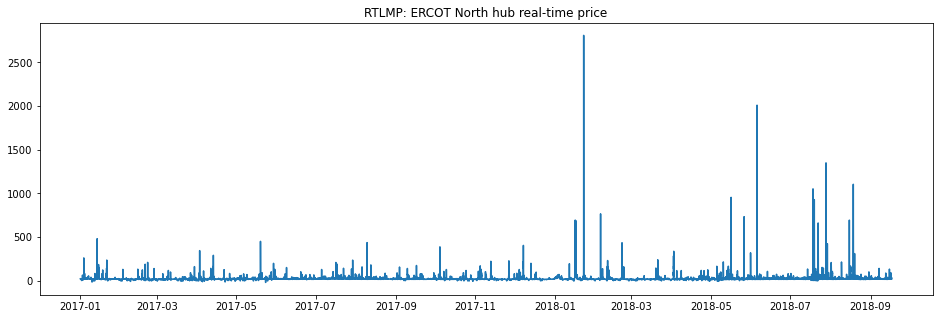

In [16]:
fig,ax = plt.subplots(figsize = (16, 5))
ax.plot(df['DATETIME'], df['HB_NORTH (RTLMP)'])
ax.set_title('RTLMP: ERCOT North hub real-time price')

#### There are some extreme value for RTLMP and it is necessary to remove the outlier to ensure the further forcasting and prediction.

Text(0.5, 0, 'PEAKTYPE')

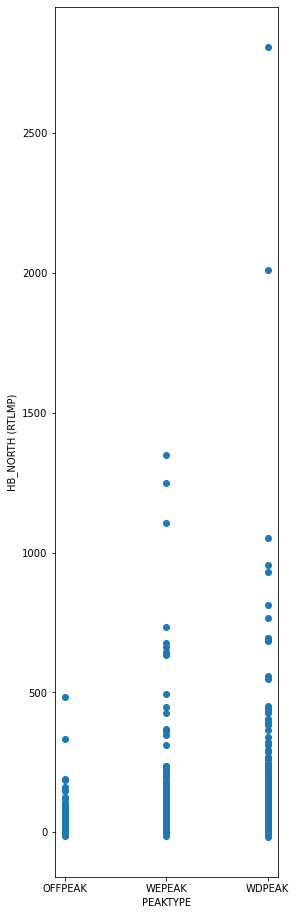

In [17]:
plt.figure(figsize=(4, 16))
plt.scatter(df['PEAKTYPE'], df['HB_NORTH (RTLMP)'])
plt.ylabel('HB_NORTH (RTLMP)')
plt.xlabel('PEAKTYPE')

In [18]:
#drop outliter
df = df[df['HB_NORTH (RTLMP)'] <= 500]
df.sort_values(by="HB_NORTH (RTLMP)", ascending=False)

,DATETIME,HB_NORTH (RTLMP),ERCOT (WIND_RTI),ERCOT (GENERATION_SOLAR_RT),ERCOT (RTLOAD),HOURENDING,MARKETDAY,PEAKTYPE,MONTH,YEAR
13623,2018-07-22 17:00:00,494.7975,3019.56,1133.62,70945.990785,17,2018-07-22,WEPEAK,07,2018
312,2017-01-14 01:00:00,482.9050,3393.45,0.11,33336.327325,1,2017-01-14,OFFPEAK,01,2017
3326,2017-05-19 16:00:00,452.2725,6048.78,658.84,53999.100555,16,2017-05-19,WDPEAK,05,2017
13765,2018-07-28 15:00:00,446.6000,2487.60,1210.72,65040.478428,15,2018-07-28,WEPEAK,07,2018
12493,2018-06-05 15:00:00,444.9850,2178.80,1218.70,63904.550605,15,2018-06-05,WDPEAK,06,2018
...,...,...,...,...,...,...,...,...,...,...
2255,2017-04-05 01:00:00,-9.6625,11972.23,0.00,32575.858775,1,2017-04-05,OFFPEAK,04,2017
218,2017-01-10 03:00:00,-11.4800,11570.82,0.11,28449.908768,3,2017-01-10,OFFPEAK,01,2017
2673,2017-04-22 11:00:00,-12.5300,11554.00,187.24,35664.608470,11,2017-04-22,WEPEAK,04,2017
217,2017-01-10 02:00:00,-13.6075,11832.67,0.11,28994.028000,2,2017-01-10,OFFPEAK,01,2017


Text(0.5, 1.0, 'RTLMP: ERCOT North hub real-time price (cleaned)')

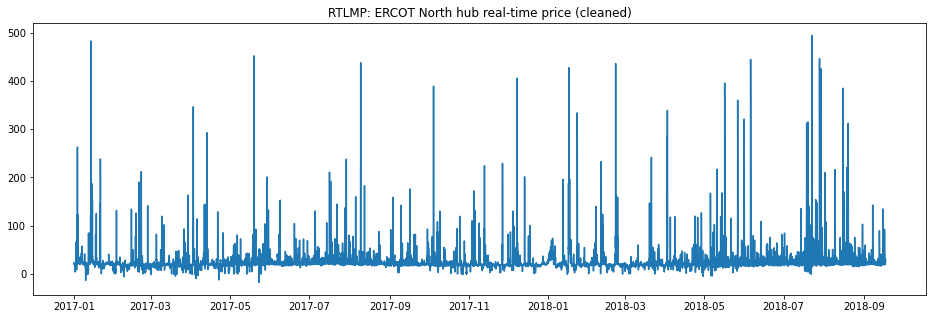

In [19]:
#recheck the RTLMP trend graph:
fig,ax = plt.subplots(figsize = (16, 5))
ax.plot(df['DATETIME'], df['HB_NORTH (RTLMP)'])
ax.set_title('RTLMP: ERCOT North hub real-time price (cleaned)')

### On average, Weekday Peek > Weekend Peak > Off Peak.

Text(0.5, 1.0, 'RTLoad: ERCOT real-time hourly actual load')

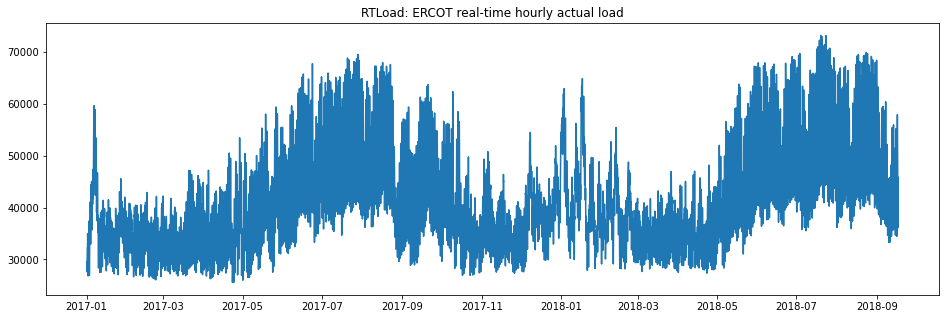

In [20]:
fig,ax = plt.subplots(figsize = (16, 5))
ax.plot(df['DATETIME'], df['ERCOT (RTLOAD)'])
ax.set_title('RTLoad: ERCOT real-time hourly actual load')

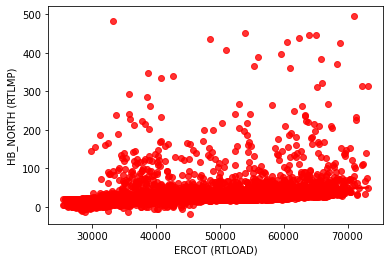

In [21]:
x = sns.regplot(x='ERCOT (RTLOAD)', y='HB_NORTH (RTLMP)', data=df, color='r')

#### There is a seasonal pattern for the RTLoad, it goes higher during the summer and drop to minimum in the winter.

Text(0.5, 1.0, 'WIND_RTI: ERCOT real-time hourly wind generation')

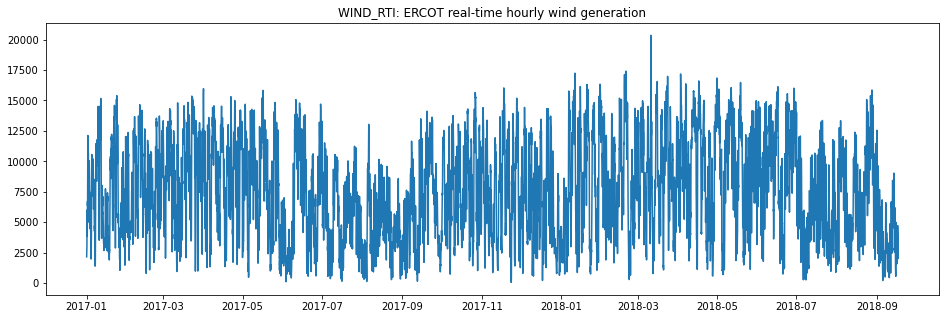

In [22]:
fig,ax = plt.subplots(figsize = (16, 5))
ax.plot(df['DATETIME'], df['ERCOT (WIND_RTI)'])
ax.set_title('WIND_RTI: ERCOT real-time hourly wind generation')

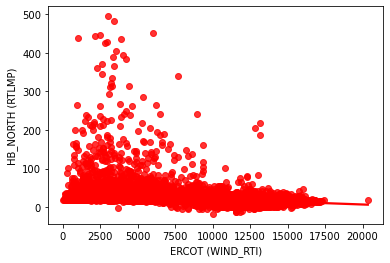

In [23]:
x = sns.regplot(x='ERCOT (WIND_RTI)', y='HB_NORTH (RTLMP)', data=df, color='r')

Text(0.5, 1.0, 'GENERATION_SOLAR_RT: ERCOT real-time solar generation')

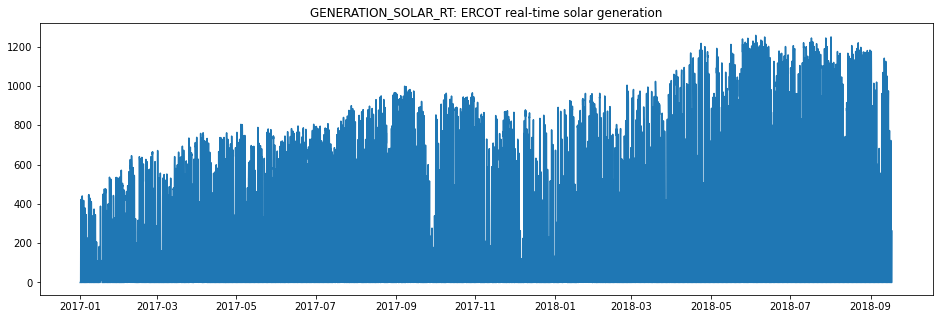

In [24]:
fig,ax = plt.subplots(figsize = (16, 5))
ax.plot(df['DATETIME'], df['ERCOT (GENERATION_SOLAR_RT)'])
ax.set_title('GENERATION_SOLAR_RT: ERCOT real-time solar generation')

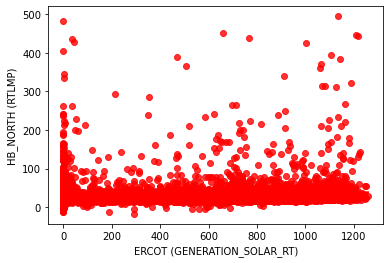

In [25]:
x = sns.regplot(x='ERCOT (GENERATION_SOLAR_RT)', y='HB_NORTH (RTLMP)', data=df, color='r')

#### There is also a seasonal pattern for the ERCOT real-time solar generation, summer is the peak season for the solar energy generation.

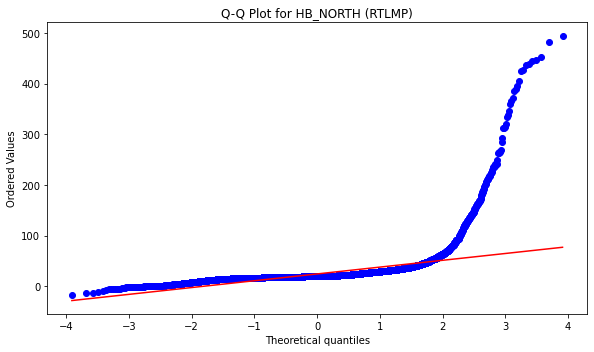

In [26]:
#Plot QQ plot
plt.figure(figsize=(16, 5))

# Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(df['HB_NORTH (RTLMP)'], plot=plt)
plt.title('Q-Q Plot for HB_NORTH (RTLMP)')

plt.tight_layout()
plt.show()

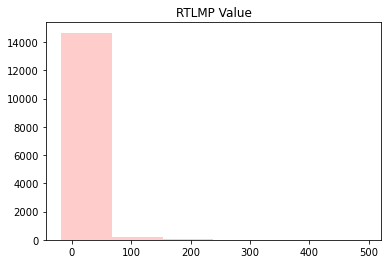

In [27]:
#histogram
plt.hist(df['HB_NORTH (RTLMP)'], bins=6, alpha=0.2, color='red')
  
plt.title("RTLMP Value")
  
plt.show()

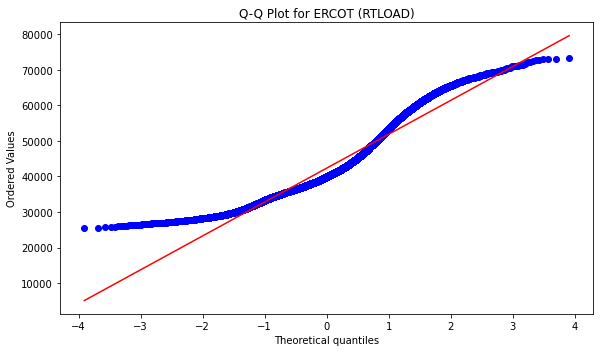

In [28]:
#Plot QQ plot
plt.figure(figsize=(16, 5))

# Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(df['ERCOT (RTLOAD)'], plot=plt)
plt.title('Q-Q Plot for ERCOT (RTLOAD)')

plt.tight_layout()
plt.show()

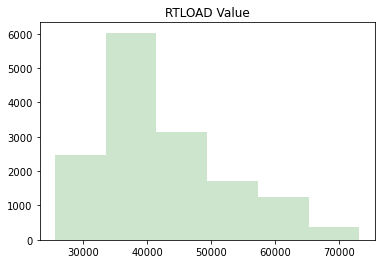

In [29]:
#histogram
plt.hist(df['ERCOT (RTLOAD)'], bins=6, alpha=0.2, color='green')
  
plt.title("RTLOAD Value")
  
plt.show()

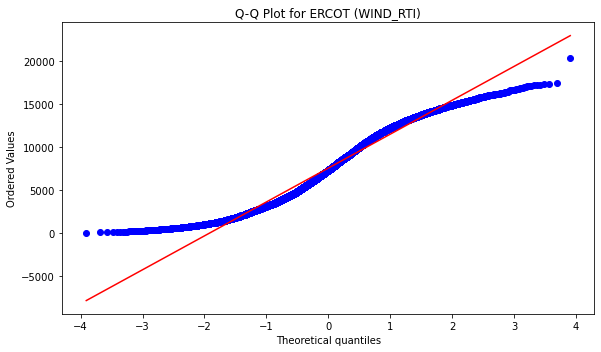

In [30]:
#Plot QQ plot
plt.figure(figsize=(16, 5))

# Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(df['ERCOT (WIND_RTI)'], plot=plt)
plt.title('Q-Q Plot for ERCOT (WIND_RTI)')

plt.tight_layout()
plt.show()

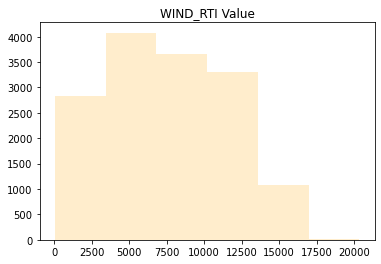

In [31]:
#histogram
plt.hist(df['ERCOT (WIND_RTI)'], bins=6, alpha=0.2, color='orange')
  
plt.title("WIND_RTI Value")
  
plt.show()

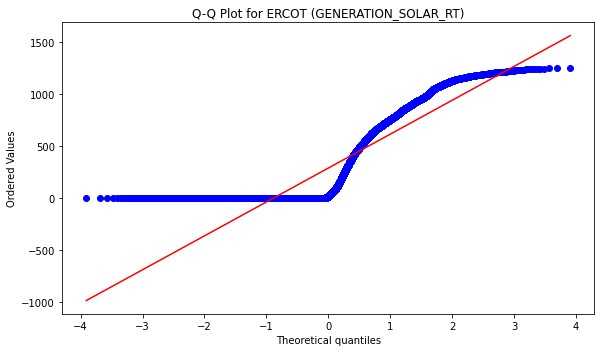

In [32]:
#Plot QQ plot
plt.figure(figsize=(16, 5))

# Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(df['ERCOT (GENERATION_SOLAR_RT)'], plot=plt)
plt.title('Q-Q Plot for ERCOT (GENERATION_SOLAR_RT)')

plt.tight_layout()
plt.show()

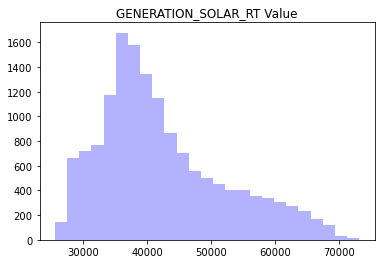

In [33]:
#histogram
plt.hist(df['ERCOT (RTLOAD)'], bins=25, alpha=0.3, color='blue')
  
plt.title("GENERATION_SOLAR_RT Value")
  
plt.show()

#### None of 4 variables are normally distributed base on the line consistency.

In [34]:
import statsmodels
#note: I found out that only numpy 1.23 support statsmodels
from statsmodels.tsa.stattools import adfuller

#took only the timeseries data
ts_RTLMP = df['HB_NORTH (RTLMP)']
ts_RTLOAD = df['ERCOT (RTLOAD)']
ts_WIND_RTI = df['ERCOT (WIND_RTI)']
ts_SOLAR_RT = df['ERCOT (GENERATION_SOLAR_RT)']

#def adf test function to test the stationarity.

def adf_test(data):
    result = adfuller(data)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

# test
adf_test(ts_RTLMP)

ADF Statistic: -16.383217491416932
p-value: 2.738741383731422e-29
Critical Values:
	1%: -3.4307881607085093
	5%: -2.861733648008762
	10%: -2.566873074173142


In [35]:
# test
adf_test(ts_RTLOAD)

ADF Statistic: -5.135010613400731
p-value: 1.19159087346091e-05
Critical Values:
	1%: -3.4307884544915375
	5%: -2.861733777838518
	10%: -2.566873143280059


In [36]:
# test
adf_test(ts_WIND_RTI)

ADF Statistic: -11.37478614270305
p-value: 8.799833858895371e-21
Critical Values:
	1%: -3.4307884544915375
	5%: -2.861733777838518
	10%: -2.566873143280059


In [37]:
# test
adf_test(ts_SOLAR_RT)

ADF Statistic: -7.635977820138659
p-value: 1.9519948521410252e-11
Critical Values:
	1%: -3.4307884544915375
	5%: -2.861733777838518
	10%: -2.566873143280059


The time series data of RTLMP, RTLOAD, WIND_RTI, and GENERATION_SOLAR_RT are likely stationary, as the extremely small p-value indicates strong evidence to reject the null hypothesis of non-stationarity.

<AxesSubplot:title={'center':'Seasonality of the Time Series for RTLMP'}, xlabel='MONTH', ylabel='HB_NORTH (RTLMP)'>

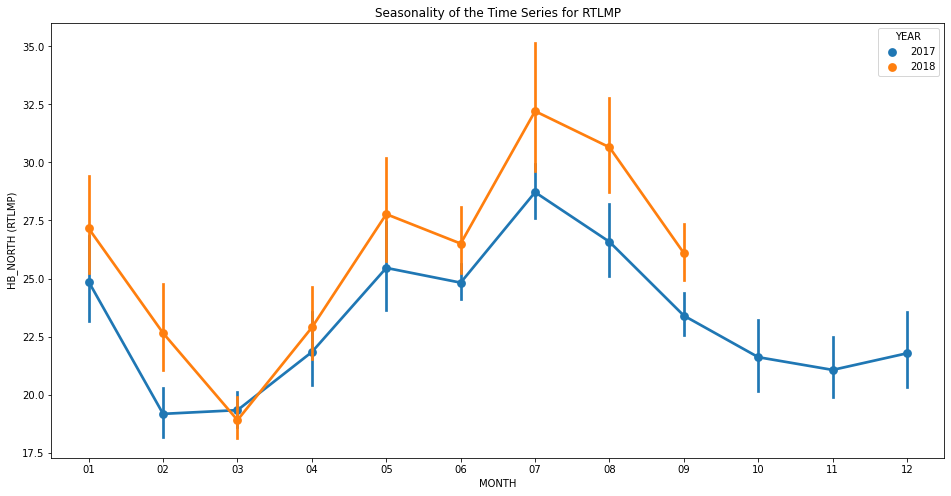

In [38]:
df_ts = df.copy()
columns_to_drop = ["DATETIME", "HOURENDING", "MARKETDAY"]
df_ts = df_ts.drop(columns=columns_to_drop)
df_ts

plt.figure(figsize=(16,8))
plt.title('Seasonality of the Time Series for RTLMP')
sns.pointplot(x='MONTH',y='HB_NORTH (RTLMP)',hue='YEAR',data=df_ts)

# Prediction and analysis

In [39]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [40]:
df.rename(columns={'HB_NORTH (RTLMP)': 'RTLMP', 
                        'ERCOT (WIND_RTI)': 'WIND_RTI', 
                        'ERCOT (GENERATION_SOLAR_RT)': 'GENERATION_SOLAR_RT', 
                        'ERCOT (RTLOAD)': 'RTLOAD'},  inplace=True)
df.head()

,DATETIME,RTLMP,WIND_RTI,GENERATION_SOLAR_RT,RTLOAD,HOURENDING,MARKETDAY,PEAKTYPE,MONTH,YEAR
0,2017-01-01 01:00:00,23.3575,2155.31,0.0,29485.791355,1,2017-01-01,OFFPEAK,01,2017
1,2017-01-01 02:00:00,21.4650,2313.81,0.0,28911.565913,2,2017-01-01,OFFPEAK,01,2017
2,2017-01-01 03:00:00,20.7350,2587.68,0.0,28238.258175,3,2017-01-01,OFFPEAK,01,2017
3,2017-01-01 04:00:00,20.2700,2748.65,0.0,27821.000513,4,2017-01-01,OFFPEAK,01,2017
4,2017-01-01 05:00:00,20.1200,2757.49,0.0,27646.942413,5,2017-01-01,OFFPEAK,01,2017


In [41]:
#turn datetime to a continuous variable:
df['Timestamp'] = (df['DATETIME'] - pd.Timestamp("2017-01-01 00:00:00")) // pd.Timedelta('1h')
df.drop(['DATETIME', 'MARKETDAY'], axis=1, inplace=True)
df.tail(5)

,RTLMP,WIND_RTI,GENERATION_SOLAR_RT,RTLOAD,HOURENDING,PEAKTYPE,MONTH,YEAR,Timestamp
14980,20.3950,3094.87,0.00,37923.34,6,OFFPEAK,09,2018,14982
14981,20.8800,3325.27,0.00,40936.18,7,WDPEAK,09,2018,14983
14982,20.8600,3195.52,2.04,41902.24,8,WDPEAK,09,2018,14984
14983,22.7675,2605.50,111.59,43014.37,9,WDPEAK,09,2018,14985
14984,31.0600,2034.80,261.65,45782.55,10,WDPEAK,09,2018,14986


In [42]:
lm_hr = smf.ols(formula = 'RTLMP ~ Timestamp + WIND_RTI + GENERATION_SOLAR_RT + RTLOAD + PEAKTYPE + MONTH + HOURENDING', data = df).fit()
print (lm_hr.summary())

                            OLS Regression Results                            
Dep. Variable:                  RTLMP   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     215.1
Date:                Tue, 23 May 2023   Prob (F-statistic):               0.00
Time:                        01:10:01   Log-Likelihood:                -66271.
No. Observations:               14960   AIC:                         1.326e+05
Df Residuals:                   14941   BIC:                         1.327e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -7.6103    

### From the Linear Model result, we could understand that the RTLMP on Weekday will be 2.33 USD higher than Offpeak, and for June, July, August, and September, the price will be 12.28/14.45/13.86/12.18 higher than the omitted month January.  

### However, this also shows RTLMP doesn't have a linear Trend to these factors, and therefore I will move to other methods when making the predictions.

By comparing the index and timestamp, the time variable is correctly created.

In [44]:
from sklearn import preprocessing

#replace the Peaktype by value
df['PEAKTYPE'] = df['PEAKTYPE'].replace({'OFFPEAK': 0, 'WEPEAK': 1, 'WDPEAK': 2})
# rescale the data for the better predictions:
drop_list=["RTLMP", "HOURENDING", "MONTH", "YEAR"]

#spliting data prepare
y = pd.DataFrame(df["RTLMP"])
X = df.drop([col for col in drop_list if col in df], axis=1)

In [45]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [96]:
def split_train_test(X, y, test_size=0.2):
    # Determine the index at which to split the data
    split_index = int(len(X) * (1 - test_size))
    
    # Split the data into training and test sets
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]
    
    return X_train, X_test, y_train, y_test

# Split the X and y data into train and test sets
X_train, X_test, y_train, y_test = split_train_test(X, y, test_size=0.2)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (11968, 5)
X_test shape: (2992, 5)
y_train shape: (11968, 1)
y_test shape: (2992, 1)


In [97]:
import numpy as np
unique_classes = np.unique(y_train)
num_classes = len(unique_classes)
print(f'Number of classes: {num_classes}')


Number of classes: 6227


In [98]:
# standardize by X data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)
X_test_scaled

,WIND_RTI,GENERATION_SOLAR_RT,RTLOAD,PEAKTYPE,Timestamp
0,0.910180,-0.778469,-0.442226,-1.281215,1.732746
1,0.734193,-0.778469,-0.557252,-1.281215,1.733035
2,0.360589,-0.778469,-0.587845,-1.281215,1.733324
3,0.285165,-0.778469,-0.443623,-1.281215,1.733614
4,0.228451,-0.778225,-0.136836,0.980709,1.733903
...,...,...,...,...,...
2987,-1.122288,-0.778469,-0.261436,-1.281215,2.601218
2988,-1.064846,-0.778469,0.088778,0.980709,2.601507
2989,-1.097194,-0.772261,0.201073,0.980709,2.601796
2990,-1.244294,-0.438881,0.330347,0.980709,2.602086


In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# number of classes:
num_classes = 6227

# one-hot vectors
y_train_categorical = to_categorical(y_train, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

model = Sequential()

# Input layer
model.add(Dense(32, activation='relu', input_shape=(5,)))

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))

# Output layer
model.add(Dense(num_classes, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate=0.01),  # note the change to `learning_rate` from `lr`
              metrics=['accuracy'])

# fit the model to the training data
model.fit(X_train_scaled, y_train_categorical, epochs=10, batch_size=32)

# evaluate the model on the test data
score = model.evaluate(X_test_scaled, y_test_categorical)

print(score)


Epoch 1/10
374/374 [==============================] - 2s 5ms/step - loss: 8.1186 - accuracy: 0.1292
Epoch 2/10
374/374 [==============================] - 2s 4ms/step - loss: 3.9793 - accuracy: 0.1451
Epoch 3/10
374/374 [==============================] - 2s 4ms/step - loss: 3.3130 - accuracy: 0.1591
Epoch 4/10
374/374 [==============================] - 2s 4ms/step - loss: 3.1218 - accuracy: 0.1704
Epoch 5/10
374/374 [==============================] - 2s 4ms/step - loss: 2.9897 - accuracy: 0.1827
Epoch 6/10
374/374 [==============================] - 2s 4ms/step - loss: 2.8943 - accuracy: 0.1930
Epoch 7/10
374/374 [==============================] - 2s 4ms/step - loss: 2.8262 - accuracy: 0.1957
Epoch 8/10
374/374 [==============================] - 2s 4ms/step - loss: 2.7730 - accuracy: 0.1979
Epoch 9/10
374/374 [==============================] - 2s 4ms/step - loss: 2.7332 - accuracy: 0.1969
Epoch 10/10
94/94 [==============================] - 0s 3ms/step - loss: 3.1088 - accuracy: 0.1237
[

C:\Apps\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


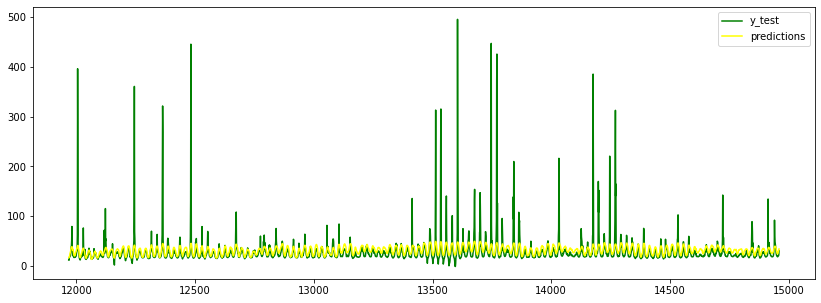

In [112]:
import statsmodels.api as sm

# Add a constant to the features
X_train_scaled_sm = sm.add_constant(X_train_scaled)
X_test_scaled_sm = sm.add_constant(X_test_scaled)

# Train the model
model = sm.OLS(y_train, X_train_scaled_sm)
results = model.fit()

# Now you can use the results object to make predictions
y_pred = results.predict(X_test_scaled_sm)


# Plotting the results
plt.figure(figsize=(14,5))

# Plotting the y_train
#plt.plot(range(len(y_train)), y_train, color='blue', label='y_train')

# Plotting the y_test
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, color='green', label='y_test')

# Plotting the predictions
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_pred, color='yellow', label='predictions')

plt.legend()
plt.show()


In [104]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit a SARIMA model
model = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
model_fit = model.fit(disp=False)

C:\Apps\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Apps\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [105]:
# make predictions
y_pred = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

C:\Apps\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


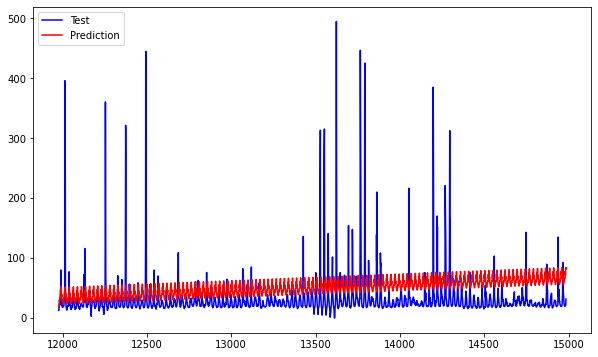

In [106]:
# plot predictions and actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test.values, label='Test', color='blue')
plt.plot(y_test.index, y_pred, label='Prediction', color='red')
plt.legend(loc='upper left')
plt.show()
